In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the JSON file into a pandas DataFrame
file_path = './data/USD_Manufacturing_PMI.json'  # Replace with the actual file path of your JSON file
df1 = pd.read_json(file_path);

# Read the JSON file into a pandas DataFrame
file_path = './data/USD_Services_PMI.json'  # Replace with the actual file path of your JSON file
df2 = pd.read_json(file_path);


# Now you can work with the DataFrame as needed
print(df2.head())  # Display the first few rows of the DataFrame

                                     id               dateUtc  \
0  c7dd5509-423a-4e75-a0c2-a372fdda7ab3  2023-07-06T13:45:00Z   
1  2e4567b0-9587-4076-99f9-87c7689847a6  2023-06-23T13:45:00Z   
2  6ef6b0a4-f3af-43c7-8b44-f24d54e849ad  2023-06-05T13:45:00Z   
3  62b4e684-00db-4e77-a6cb-ecc7cf0cb090  2023-05-23T13:45:00Z   
4  d90aaa1c-b05c-4051-8089-b12ee88a10ff  2023-05-03T13:45:00Z   

          periodDateUtc  actual  revised  consensus  previous  ratioDeviation  \
0  2023-06-01T00:00:00Z    54.4      NaN       54.1      54.1         0.25175   
1  2023-06-01T00:00:00Z    54.1      NaN       54.0      54.9         0.06890   
2  2023-05-01T00:00:00Z    54.9      NaN       55.1      55.1        -0.11764   
3  2023-05-01T00:00:00Z    55.1      NaN       52.6      53.6         1.52190   
4  2023-04-01T00:00:00Z    53.6      NaN       53.7      53.7        -0.05553   

   isPreliminary  isBetterThanExpected  
0          False                   1.0  
1           True                   1.0  

In [28]:
#replacing NaN value of consensus and actual with it's previous value

df1['consensus'] = df1['consensus'].fillna(method='ffill')
df1['actual'] = df1['actual'].fillna(method='ffill')



df1['diff'] = df1['actual'] - df1['consensus']


#replacing NaN value of consensus and actual with it's previous value

df2['consensus'] = df2['consensus'].fillna(method='ffill')
df2['actual'] = df2['actual'].fillna(method='ffill')

filtered_df1 = df1[df1['isPreliminary'] != False]
filtered_df2 = df2[df2['isPreliminary'] != False]

print(filtered_df1.head(4));


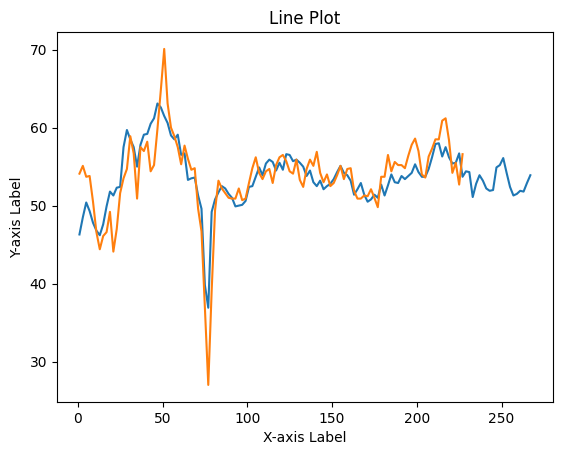

In [29]:

plt.plot(filtered_df1.index, filtered_df1['actual'], label='Actual')
# plt.plot(df1.index, df1['consensus'], label='Consensus')

plt.plot(filtered_df2.index, filtered_df2['actual'], label='Actual')
# plt.plot(df2.index, df2['consensus'], label='Consensus')


#plt.plot(df.index, df['diff'], label='Consensus')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()